## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果 ( reducing dropout rate from 0.25 to 0.15 produce better result, adding one layer may not help much.)
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果 ( Adam is not as good as SGD )


In [38]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [39]:
train, test = keras.datasets.cifar10.load_data()

In [40]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [41]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [42]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
#MOMENTUM = 0.95
Dropout_EXP = 0.15

In [46]:
from keras.layers import Dropout
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer_1"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer_1"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [47]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=Dropout_EXP)
model.summary()
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer_11 (Dense)      (None, 512)               1573376   
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_15 (Dropout)         (None, 256)               0         
_________________________________________________________________
hidden_layer_12 (Dense)      (None, 256)               65792     
_________________________________________________________________
dropout_16 (Dropout)         (None, 256)               0         
__________

Epoch 46/50
50000/50000 [==============================] - 9s 179us/step - loss: 1.3434 - acc: 0.5185 - val_loss: 1.3742 - val_acc: 0.5094
Epoch 47/50
50000/50000 [==============================] - 9s 178us/step - loss: 1.3332 - acc: 0.5215 - val_loss: 1.3767 - val_acc: 0.5122
Epoch 48/50
50000/50000 [==============================] - 9s 182us/step - loss: 1.3305 - acc: 0.5230 - val_loss: 1.3735 - val_acc: 0.5088
Epoch 49/50
50000/50000 [==============================] - 9s 175us/step - loss: 1.3377 - acc: 0.5215 - val_loss: 1.3903 - val_acc: 0.5030s: 1 - ETA: 0s - loss: 1.3374 - a
Epoch 50/50
50000/50000 [==============================] - 9s 177us/step - loss: 1.3257 - acc: 0.5258 - val_loss: 1.3858 - val_acc: 0.5060


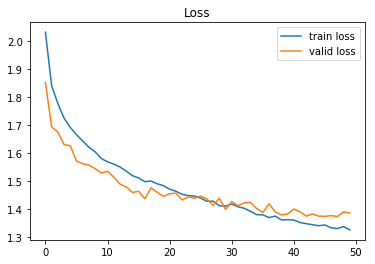

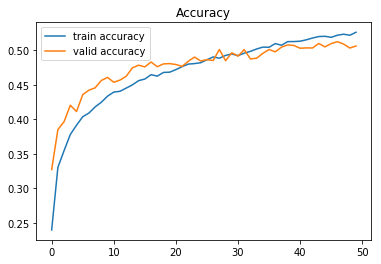

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()